# Data Analysis Project - Store Profit and Sales analytics

In [97]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as color
pio.templates.default = "plotly_white"


In [98]:
data = pd.read_csv("Sample - Superstore.csv",encoding = 'latin-1')

In [99]:
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [100]:
print(data.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [101]:
#Expanding Date in Month,Year and week
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

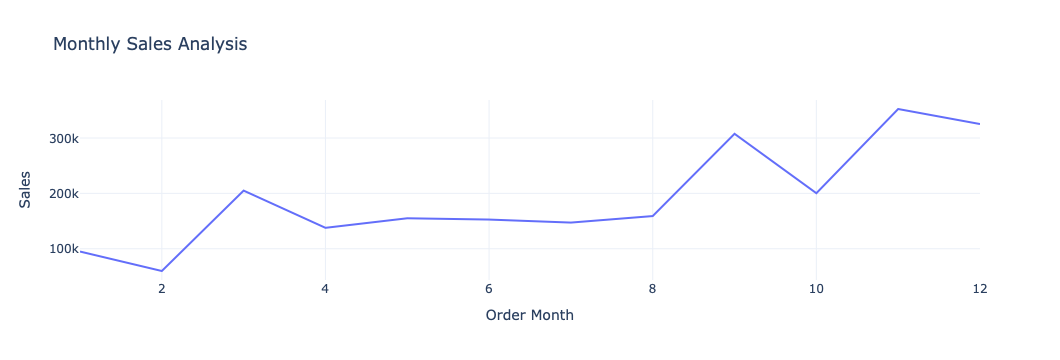

In [102]:
#Lets see monthly sales
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month,x = 'Order Month',y = 'Sales',title = 'Monthly Sales Analysis')
fig.show()

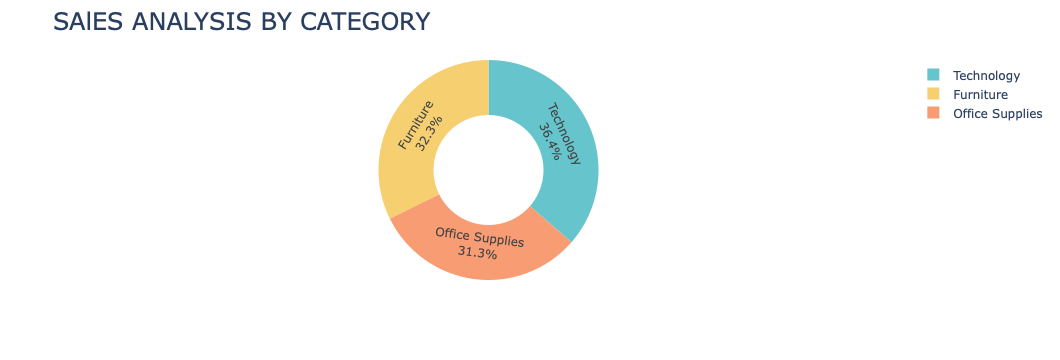

In [103]:
#Sales by category
sales_by_cat = data.groupby('Category')['Sales'].sum().reset_index()
fig = px.pie(sales_by_cat,values = 'Sales',names = 'Category',hole = 0.5 ,color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside',textinfo = 'percent+label')
fig.update_layout(title = "SAlES ANALYSIS BY CATEGORY",title_font = dict(size = 24))
fig.show()

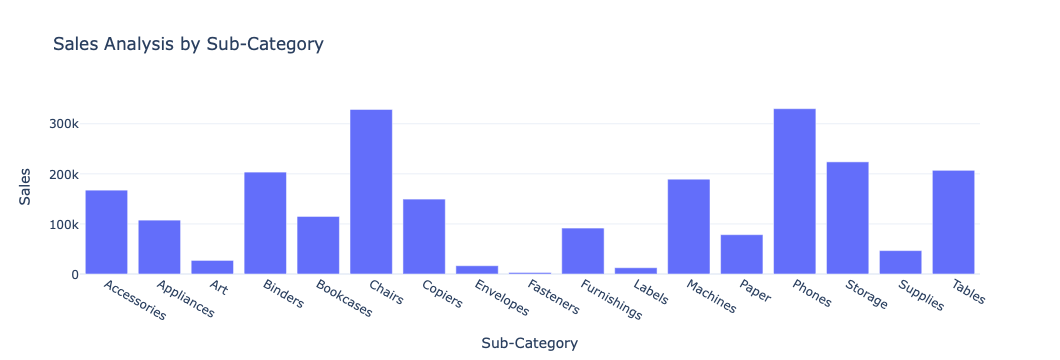

In [104]:
#Sales by sub-category
sales_by_subcat = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcat,x = 'Sub-Category',y = 'Sales',title = 'Sales Analysis by Sub-Category')
fig.show()

# PROFIT ANALYSIS

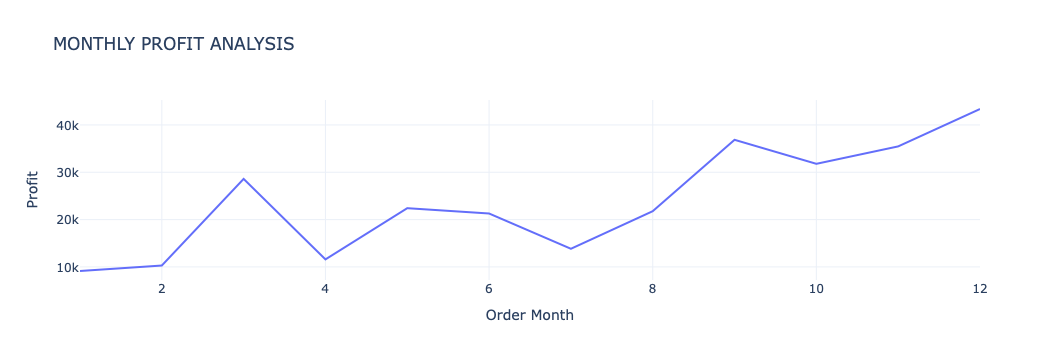

In [106]:
#PROFIT ANALYSIS
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month,x = 'Order Month',y = 'Profit',title = 'MONTHLY PROFIT ANALYSIS')
fig.show()

# PROFIT BY CATEGORY

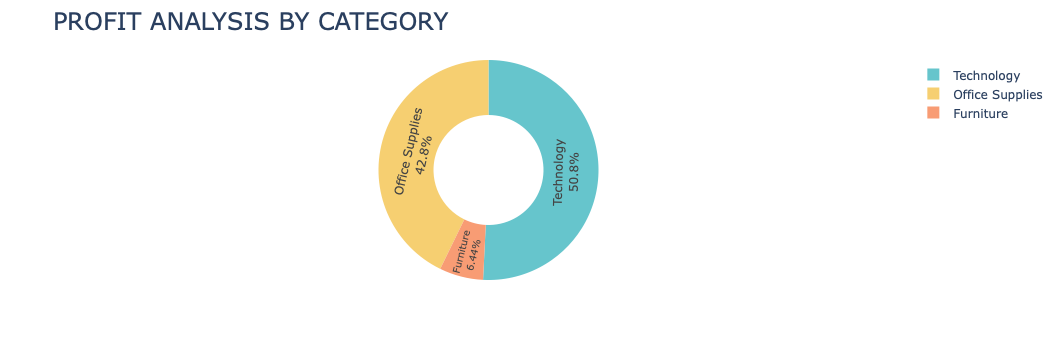

In [108]:
profit_by_cat = data.groupby('Category')['Profit'].sum().reset_index()
fig = px.pie(profit_by_cat,values = 'Profit',names = 'Category',hole = 0.5 ,color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside',textinfo = 'percent+label')
fig.update_layout(title = "PROFIT ANALYSIS BY CATEGORY",title_font = dict(size = 24))
fig.show()

# sales and profit analysis by Customer Segment

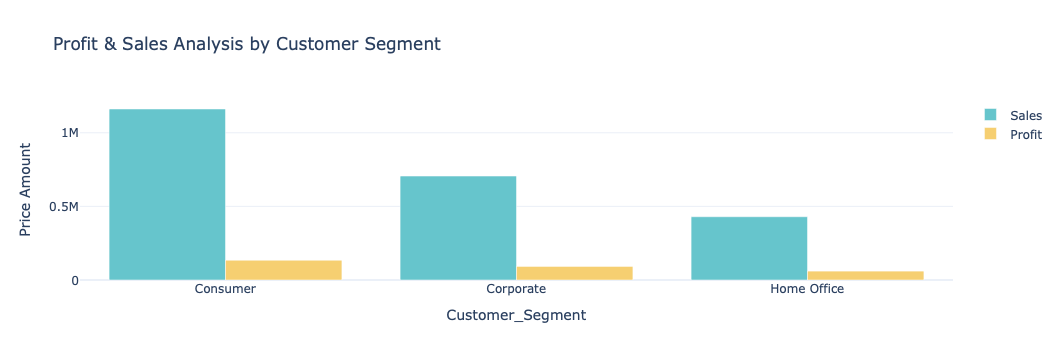

In [110]:
sales_profit_By_segment = data.groupby('Segment').agg({'Sales' : 'sum','Profit':'sum'}).reset_index()
color_palette = color.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x = sales_profit_By_segment['Segment'],y = sales_profit_By_segment['Sales'],name = 'Sales',marker_color = color_palette[0]))
fig.add_trace(go.Bar(x = sales_profit_By_segment['Segment'],y = sales_profit_By_segment['Profit'],name = 'Profit',marker_color = color_palette[1]))
fig.update_layout(title = 'Profit & Sales Analysis by Customer Segment',xaxis_title = 'Customer_Segment',yaxis_title = 'Price Amount')
fig.show()

# Sales to Profit Ratio

In [112]:
sales_profit_By_segment = data.groupby('Segment').agg({'Sales' : 'sum','Profit':'sum'}).reset_index()
sales_profit_By_segment['Sales_to_profit_Ratio'] = sales_profit_By_segment['Sales']/sales_profit_By_segment['Profit']
print(sales_profit_By_segment[['Segment','Sales_to_profit_Ratio']])

       Segment  Sales_to_profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
